<h1>Clean and Analyze Employee Exit Surveys</h1>

This project will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In [1]:
# read source data
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()
dete_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


<h2>Drop Data</h2>



In [4]:
# DETE columns dropped
columns1 = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns1,axis=1)

#TAFE columns dropped
columns2 = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(columns2,axis=1)


<h2>Clean Column Names</h2>

In [5]:
# Rename columns names of DETE dataset
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [6]:
#Rename columns name of TAFE dataset by df.rename()

renames = {'Record ID':'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?':'gender','CurrentAge. Current Age':'age',
          'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(renames,axis=1)
#tafe_survey_updated.columns

In [7]:
#dete_survey_updated.head()
#tafe_survey_updated.head()

<h2>Filter Data</h2>
<p>1. The column named Separationtype recorded different separation types, we should analyze 'Resignation', which represents employee resign</p>

In [8]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

<p>2. There are 3 tyes of resignations in DETE dataset, all of them should be selected.</p>

In [10]:
resignations = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[resignations].copy()
#check if all required data are seleted
dete_resignations['separationtype'].value_counts()


Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [11]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
#tafe_resignations

<h2>Clean time data</h2>

The employees' start_date should smaller than their ease_date

In [12]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [13]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([2][0-9]{3})").astype('float')
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)



2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [14]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

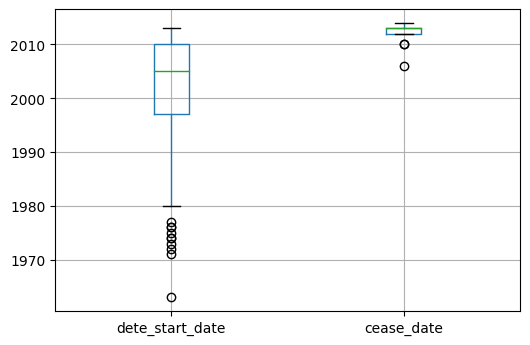

In [15]:
#display in jupyter
%matplotlib inline
# Use the boxplot to show the data 
dete_resignations.boxplot(column=['dete_start_date','cease_date'])

In [16]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

<h2>Create New columns of time period</h2>

We should verify that employees who have only worked for a short period of time resigning due to some kind of dissatisfation. 

In tafe_resignations, it contains a column called 'institute_service' introducing the working period of employees. To simply combined the two dataset, we should create a column 'institute_service' for dete_resignations.

In [17]:
dete_resignations['institute_service']=dete_resignations['cease_date'] - dete_resignations['dete_start_date']


Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction


2. dete_survey_updated:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload


In [18]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)


-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [19]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.


In [20]:
def update_vals(val):
    if pd.isnull(val): return np.nan
    elif val == '-': return False
    return True
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = \
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)


In [21]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1,skipna=False)
#dete_resignations['dissatisfied'] = dete_resignations.any(axis=1,skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [23]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [24]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

<h2>Add New column to classify each dataset, and combine the two set</h2>

In [25]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)


In [26]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

<h2>Delete columns with over 500 null values</h2>

The combined data shape is 651*53, if the column contains more than 500 null values, it useless.

In [27]:
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [28]:
combined_updated=combined.dropna(thresh=500,axis=1).copy()
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


<h2>Classify woring experience by working period</h2>

In [29]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [30]:
combined_updated['institute_service'] = \
combined_updated['institute_service'].astype(str).str.extract(
r"(\d+)").astype(float)

#\d is used to match [0-9] with string pattern
#we only need to extract the first digit to ensure working experience

In [31]:
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

Define a function to classify employees working experience

In [32]:
def career_stag(val):
    if pd.isnull(val): return np.nan
    if val < 3: return 'New'
    if val >= 3 and val<= 6: return 'Experienced'
    if val >= 7 and val<=10: return 'Established'
    return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(career_stag)

In [33]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

<h2>Analyze the relationship between working category and dissatification </h2>

In [34]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

As there are some missing values in the 'dissatidfied' column, and the number of null values is not too much. Thus, we can use the most frequent values to fill the na values.

In [35]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

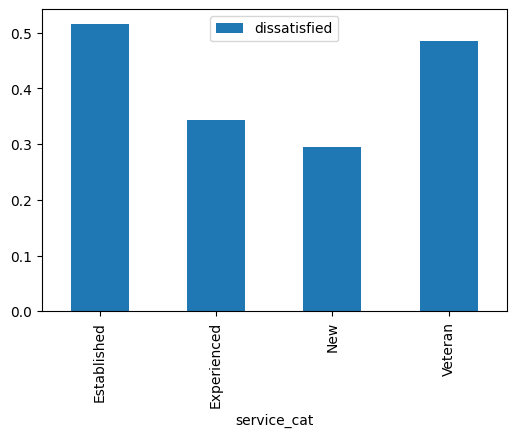

In [36]:
dis_per = combined_updated.pivot_table(index='service_cat',values='dissatisfied')

%matplotlib inline

dis_per.plot(kind='bar')

<h2>Clean 'Age' Column</h2>

Clean 'age' column and use the data to analyze the relationship between age group and dissatisfation.

In [37]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

According to the age data, we divided the age into 8 groups:

- less than or equal to 25
- 26 to 30
- 31 to 35
- 36 to 40
- 41 to 45
- 46 to 50
- 51 to 55
- 56 or older


In [38]:
combined_updated['age'] = combined_updated['age'].astype(str).str.extract(r'(\d+)').astype(float)

In [39]:
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [42]:
def age_group(val):
    if pd.isnull(val): return np.nan
    elif val <= 25: return '18 - 25'
    elif val >= 26 and val <= 30: return '26 - 30'
    elif val >= 31 and val <= 35: return '31 - 35'
    elif val >= 36 and val <= 40: return '36 - 40'
    elif val >= 41 and val <= 45: return '41 - 45'
    elif val >= 46 and val <= 50: return '46 - 50'
    elif val >= 51 and val <= 55: return '51 - 55'
    elif val >= 56: return '56 and more'

combined_updated['age_group'] = combined_updated['age'].apply(age_group)

In [45]:
combined_updated['age_group'].value_counts(dropna=False).sort_index(ascending=True)

18 - 25        72
26 - 30        67
31 - 35        61
36 - 40        73
41 - 45        93
46 - 50        81
51 - 55        71
56 and more    78
NaN            55
Name: age_group, dtype: int64

In [46]:
# relationship between age_group and dissatisfaction

age_disaf = combined_updated.pivot_table(index='age_group',values='dissatisfied')
age_disaf

# dropna default is True

,dissatisfied
age_group,
18 - 25,0.291667
26 - 30,0.417910
31 - 35,0.377049
36 - 40,0.342466
41 - 45,0.376344
46 - 50,0.382716
51 - 55,0.422535
56 and more,0.423077


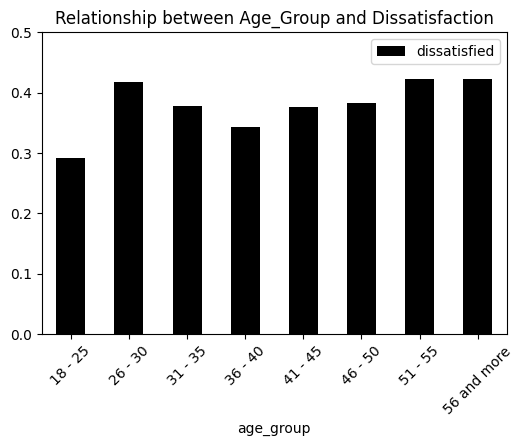

In [50]:
age_disaf.plot(kind='bar',title='Relationship between Age_Group and Dissatisfaction',rot=45,ylim=(0,0.5), color='k')
               
               

<h4>The results show that people among the three age group are earsier to resign due to some kind of dissatisfaction:</h4>

- 26 - 30
- 51 - 55
- 56 and more

<h2>Analyze each institute</h2>

In [52]:
#dete = combined_updated['institute']=='DETE'
#tafe = combined_updated['institute']=='TAFE'

ins_dis = combined_updated.pivot_table(index='institute',values='dissatisfied')
ins_dis


,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


In [54]:
ins_dis_age = combined_updated.pivot_table(index=['institute','age_group'],
                                          values='dissatisfied')

ins_dis_age

dissatisfied
institute age_group                
DETE      18 - 25          0.300000
          26 - 30          0.571429
          31 - 35          0.551724
          36 - 40          0.390244
          41 - 45          0.479167
          46 - 50          0.452381
          51 - 55          0.593750
          56 and more      0.551020
TAFE      18 - 25          0.285714
          26 - 30          0.250000
          31 - 35          0.218750
          36 - 40          0.281250
          41 - 45          0.266667
          46 - 50          0.307692
          51 - 55          0.282051
          56 and more      0.206897

<h1>Conclusion </h1>
Answer the initial questions based on our analysis:

- **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**

No, more employees worked for a longer period time resigning according to our results. The groups Established(worked 7-10 years) and Veteran(worked more than 10 years) have higher resign rate. 

- **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

Older employees from the age group (51 - 55) and (56 and more) have higher resign numbers, which are both around 0.423. While younger employees aged from 26 to 30 years old also has relatively higher resigning ratio, which is 0.418. 

- **How many people in each age group resgined due to some kind of dissatisfaction?**

As listed above.

- **Did more empoyees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?**

Yes, there are more employees resigned due to dissatisfactions from DETE (0.479) than TAFE (0.268)